# 使用Seaborn进行数据可视化实操


- **Matplotlib** 虽然已经是比较优秀的绘图库了, 但是它有个今人头疼的问题, 那就是**API使用过于复杂**, 它里面有上干个函数和参数, 属于典型的那种可以用它做任何事, 却无从下手。

- **Seaborn** 基于**Matplotlib核心库**进行了**更高级的API封装**, 可以轻松地画出更漂亮的图形, 而Seaborn的漂亮主要体现在配色更加舒服,以及图形元素的样式更加细淢。


- 官方网址：https://seaborn.pydata.org/

## 实验准备

> <time>5 min</time>

### 实验背景

Seaborn是基于matplotlib的图形可视化python包。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。

通过本次实验我们对 Seaborn 在数据可视化的具体操作进行进一步学习和加强。

### 实验步骤

本次实验分为以下几个环节：
- 1) Seaborn风格管理操作
- 2) Seaborn颜色管理操作
- 3) 探索变量间的关系(基于Seaborn)
- 4) 如何让分布更加直观(基于Seaborn)
- 5) 如何选择合适的可视化方案(基于Seaborn)


## 实验操作

> <time>60 min</time>

### Seaborn风格管理操作


首先，引入案例所需的python库：

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt

# !pip install seaborn
import seaborn as sns


给每一个任务单独分配随机种子

In [3]:
np.random.seed(sum(map(ord, "aesthetics"))) 

先来看看matplotlib画出来的图啥样子~

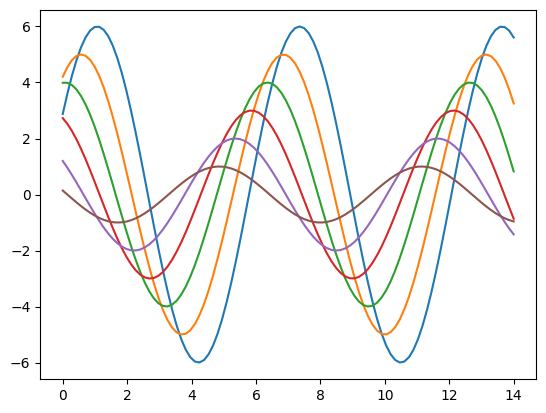

In [4]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7): # up to but not include
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        
sinplot()

再来看看seaborn画出来滴：

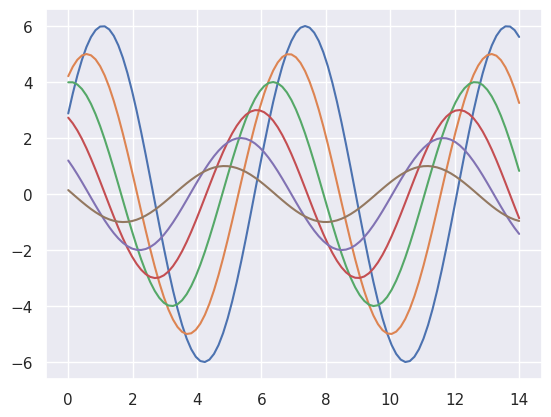

In [5]:
sns.set()
sinplot()


seaborn绘图：色彩柔和！灰色背景！白色网格！

In [6]:
sns.__version__ # '0.7.1' dont need sns.set()

'0.13.0'

#### 风格参数设置

就下面5种主题风格：

- darkgrid/whitegrid（深色带格子／白色带格子）：更关注数值，所以带格子嘛～
- dark/white：更关注整体趋势
- ticks：强化刻度

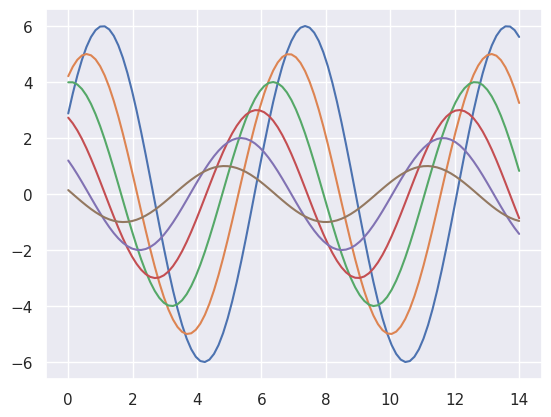

In [7]:
sns.set_style("darkgrid")
sinplot()

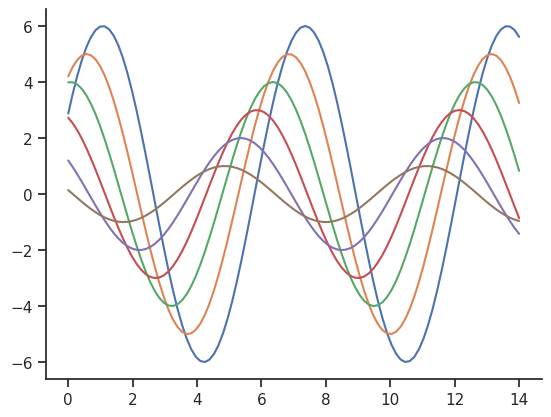

In [8]:
sns.set_style("ticks")
sinplot()
sns.despine() # despine()函数是去掉了上右边框

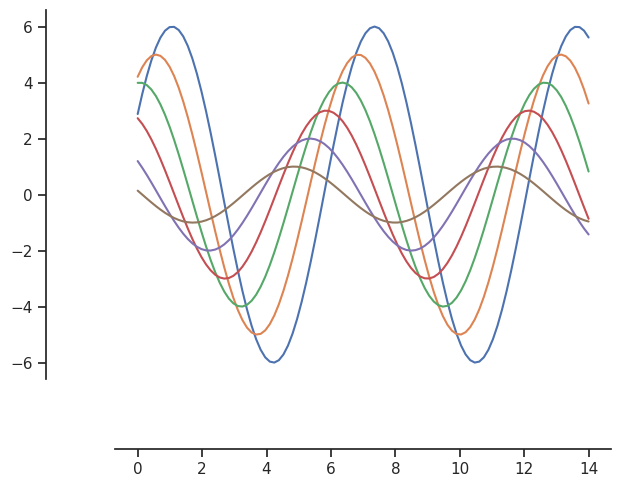

In [9]:
sinplot()
sns.despine(offset=50) # offset参数可以调节分离坐标轴

#### 尺度参数设置

比如用于期刊论文：

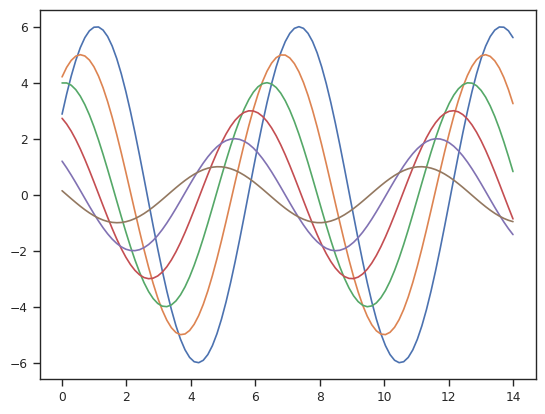

In [10]:
sns.set_context("paper") 

sinplot()

比如用于本notebook文档：

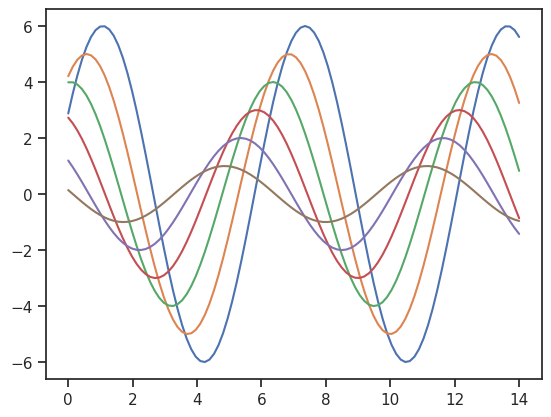

In [11]:
sns.set_context("notebook")

sinplot()

比如需要嵌入到ppt中：

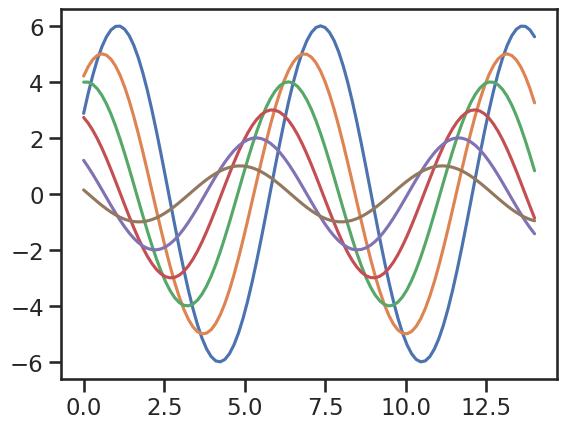

In [12]:
sns.set_context("talk")
sinplot()

比如用于展板：

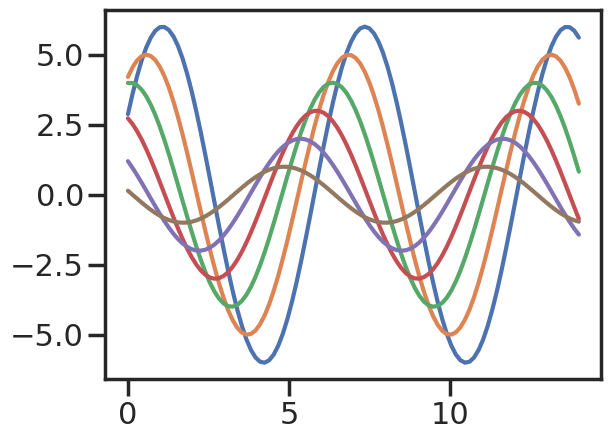

In [13]:
sns.set_context("poster") 
sinplot()

可以微调：

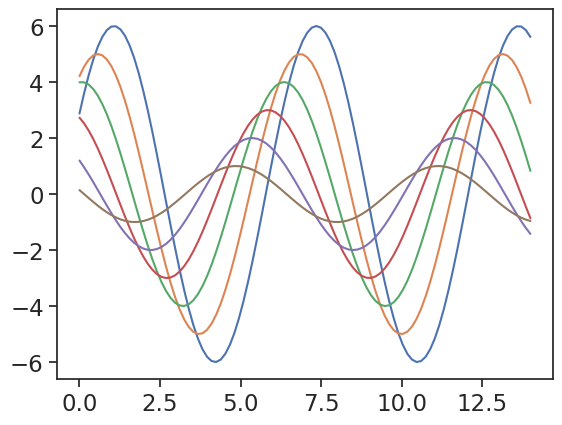

In [14]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sinplot()

>想一步到位直接对应的期刊风格（Science、Nature、IEEE ...）？ 看这里：https://github.com/garrettj403/SciencePlots

### Seaborn颜色管理操作


1. 分类调色板
2. 序列调色板
3. 分叉调色板

#### 分类调色板

- 适用于分类描述的数据，而且分类之间无序
- 两个颜色系统：
  - hls颜色系统（默认），色调+亮度+饱和度（hue + luminance + saturation）
  - husl颜色系统，hls中不同颜色存在视差，eg.黄色偏亮，蓝色偏暗，husl使得更加平衡

恢复默认设置

In [15]:
sns.set() # 恢复默认设置

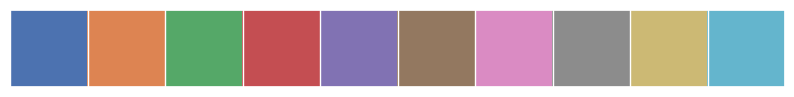

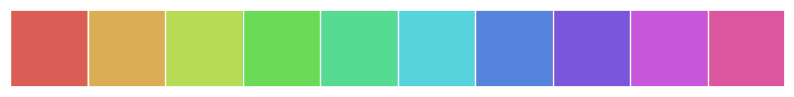

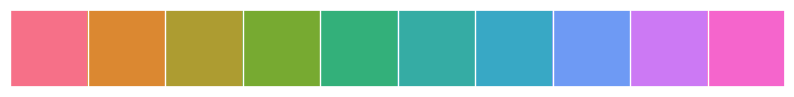

In [16]:
# 绘制当前调色板
current_palette = sns.color_palette()
sns.palplot(current_palette)

# 绘制hls系统下的10色调色板（黄色偏暗 蓝色偏亮）
sns.set_palette(sns.color_palette("hls", 10))
current_palette = sns.color_palette()
sns.palplot(current_palette)

# 绘制husl系统下的10色调色板（与hls相比，色彩不突兀）
sns.set_palette(sns.color_palette("husl", 10)) # http://www.hsluv.org
current_palette = sns.color_palette()
sns.palplot(current_palette)

- 当你有六个以上的分类要区分时，最简单的方法就是在一个圆形的颜色空间中画出均匀间隔的颜色 (这样的色调会保持亮度和饱和度不变)。这是大多数的当他们需要使用比当前默认颜色循环中设置的颜色更多时的默认方案。
- 最常用的方法是使用hls的颜色空间，这是RGB值的一个简单转换。
- 由于人类视觉系统的工作方式，会导致在RGB度量上强度一致的颜色在视觉中并不平衡。比如，我们黄色和绿色是相对较亮的颜色，而蓝色则相对较暗，使得这可能会成为与hls系统一致的一个问题。
- 为了解决这一问题，seaborn为husl系统提供了一个接口，这也使得选择均匀间隔的色彩变得更加容易，同时保持亮度和饱和度更加一致。

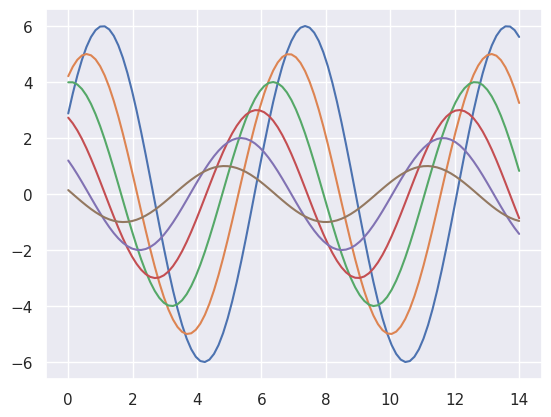

In [17]:
sns.set() # 默认调色板
sinplot()

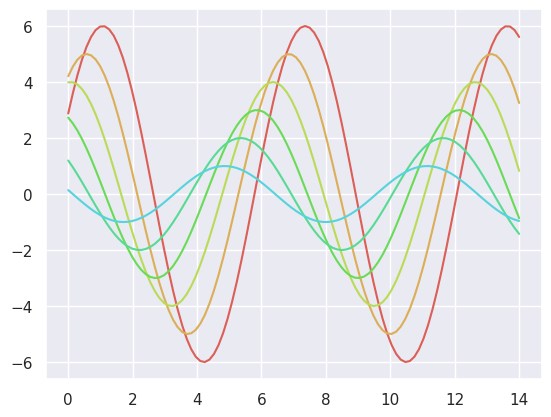

In [18]:
sns.set_palette(sns.color_palette("hls", 10))
sinplot()

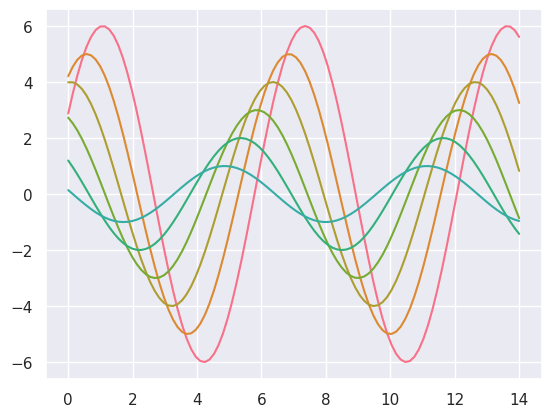

In [19]:
sns.set_palette(sns.color_palette("husl", 10)) 
sinplot()

#### 序列调色板

- 主要通过亮度和饱和度区分有序分类
- 关注单级数据

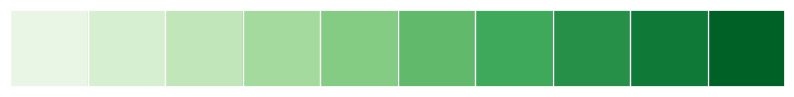

In [24]:
sns.palplot(sns.color_palette("Greens",10))

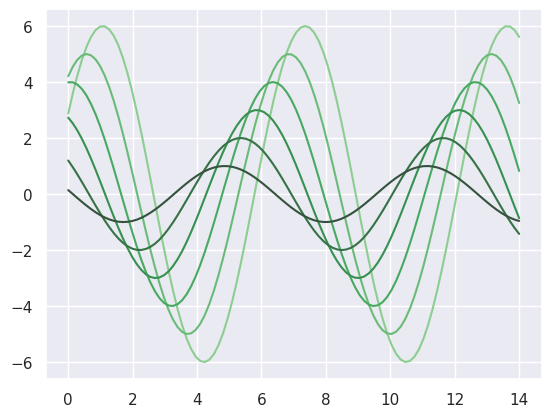

In [27]:
with sns.color_palette("Greens_d"):
    sinplot()

#### 分叉调色板

- 关注两级数据

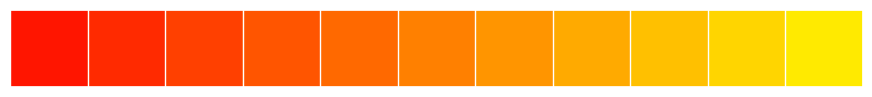

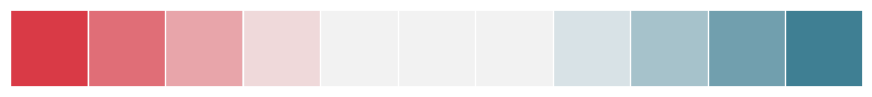

In [28]:
sns.palplot(sns.color_palette("autumn",11)) # 比如表示温度梯度
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=11))

- 关注多级数据

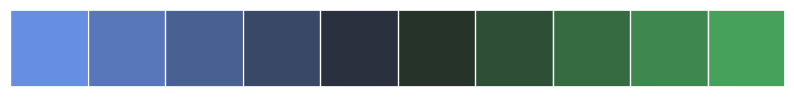

In [29]:
sns.palplot(sns.diverging_palette(255, 133, l=60, n=10, center="dark"))

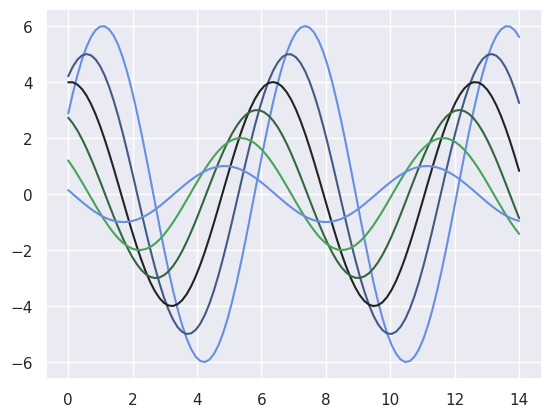

In [30]:
with sns.diverging_palette(255, 133, l=60, n=5, center="dark"):
    sinplot()

>See more?
>- https://seaborn.pydata.org/tutorial/color_palettes.html
>- https://github.com/matplotlib/cheatsheets

- 如何照顾色弱读者？

    1. **Choose a colorblind-friendly palette**: online tools like [ColorBrewer](http://colorbrewer2.org/) and [Coolors](https://coolors.co/) make it very easy to find an appropriate color scheme nowadays. You can also use an online color blindness simulator like [Coblis](https://www.color-blindness.com/coblis-color-blindness-simulator/) to check how your plot may look like to other people.
    2. **But don’t rely only on colors**: add different geometrical shapes, line patterns, fill textures or even labels to your plots. This will improve readability for everyone, including people that don’t have color blindness.

### 探索变量间的关系（基于Seaborn）


- 数据变量之间的关联性，主要针对定量数据而言；
- 数据的分布问题也是主要针对定量数据；
- 分组问题及组间问题里，就是在数据分析中，一定会包括定序和定类数据。

比统计更直观呢~

恢复seaborn默认设置：

In [31]:
sns.set()

设置随机种子，同一个种子值，产生的随机数相同

In [32]:
np.random.seed(sum(map(ord, "regression"))) # ord 整型


加载餐厅小费案例（seaborn内置），并显示前面部分数据：

In [33]:
tips = sns.load_dataset("tips") 
tips.head()


total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

#### 绘制线性回归模型

- 最简单的方式：散点图 + 线性回归 + 95%置信区间

- 小费收入与餐厅消费成正比

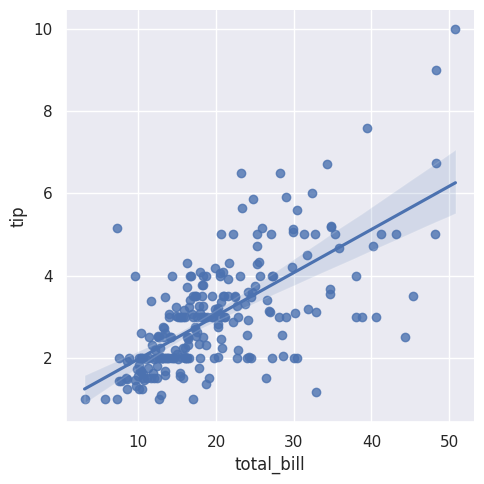

In [34]:
sns.lmplot(x="total_bill", y="tip", data=tips) # confidence interval

(可以看到total_bill和tip之间存在线性相关关系)

(置信区间很小不仅是因为数据量的体现，也会确实是置信的体现)

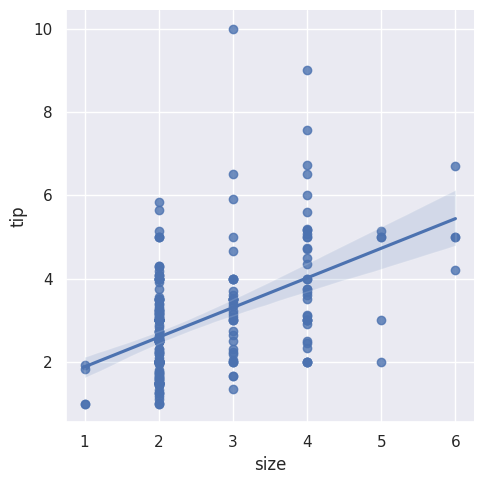

In [35]:
sns.lmplot(x="size", y="tip", data=tips)

(size是离散值，乃定类数据！

当然也可能拟合，但看上去很怪，咋整？)

- 方法1：加个小的抖动

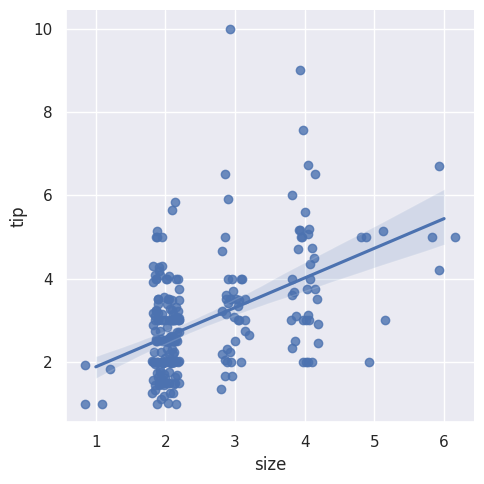

In [36]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=0.2) # x_jitter抖动的幅度
# 在基准位置左右0.2范围内随机抖动。。。。

- 方法2：离散取值上用均值和置信区间代替散点

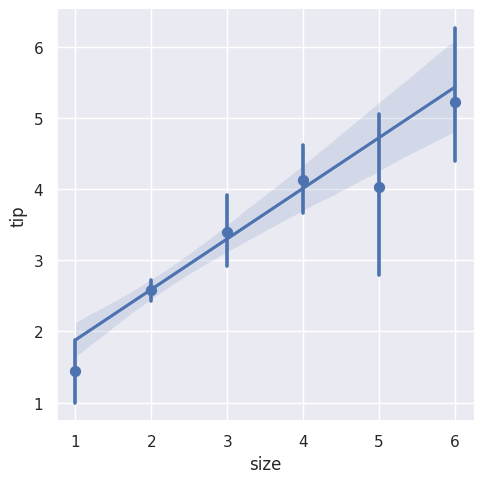

In [37]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

#### 拟合不同模型

有些时候线性拟合效果不错，有些时候差强人意~

1973年统计学家 Anscombe 构造出了四组奇特的数据。它告诉人们,在分析数据之前,描绘数据所对应的图像有多么的重要。

这四组数据中，x值的平均数都是9.0，y值的平均数都是7.5；x值的方差都是10.0，y值的方差都是3.75；它们的相关度都是0.816，线性回归线都是y=3+0.5x。

单从这些统计数字上看来，四组数据所反映出的实际情况非常相近，而事实上，这四组数据有着天壤之别。 REF：http://www.matrix67.com/blog/archives/2308

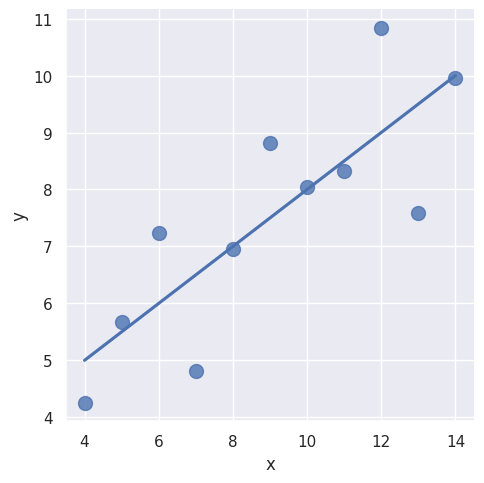

In [38]:
# 置信区间 （有时为了画的快些而关掉）
# ci：confidence intervals 
# kws：key word arguments
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y"
           , data=anscombe.query("dataset == 'I'")
           , ci=None, scatter_kws={"s": 100}) 
# s表示size，点的大小
# 关于df的query函数： 
# df.query('a > b')  >>>  df[df.a > df.b]

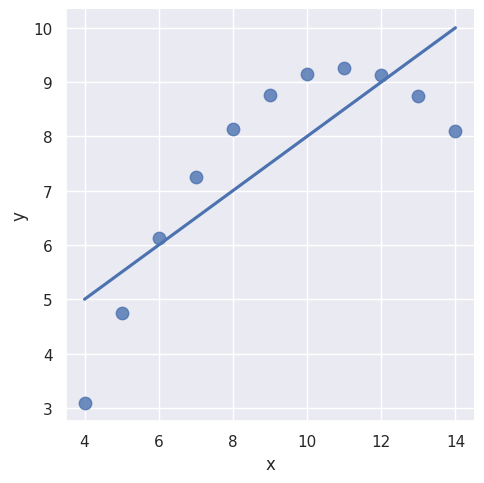

In [39]:
sns.lmplot(x="x", y="y"
           , data=anscombe.query("dataset == 'II'")
           , ci=None
           , order=1
           , scatter_kws={"s": 80})  
# 加一个order=2参数可以很好的拟合

试试高阶拟合

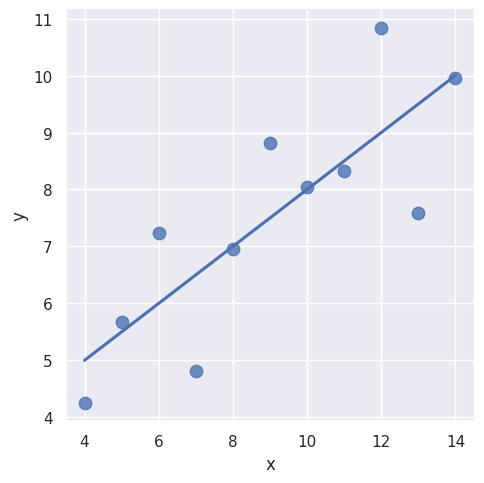

In [42]:
sns.lmplot(x="x", y="y"
           , data=anscombe.query("dataset == 'I'")
           , order=1, ci=None
           , scatter_kws={"s": 80})

遇到异常值怎么办?

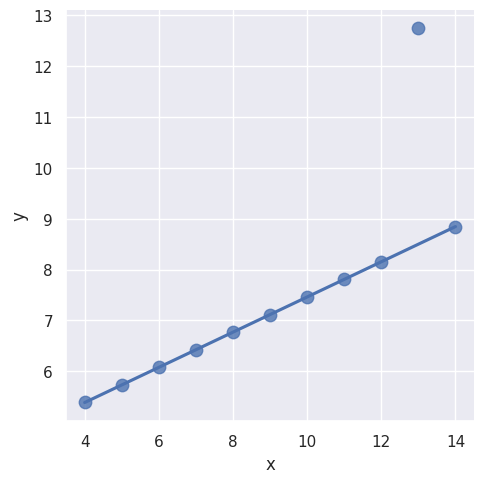

In [43]:
sns.lmplot(x="x", y="y"
           , data=anscombe.query("dataset == 'III'")
           , robust=True
           , ci=None
           , scatter_kws={"s": 80})
# robust乃鲁棒性，表现的是异常和容错的反应，抗干扰

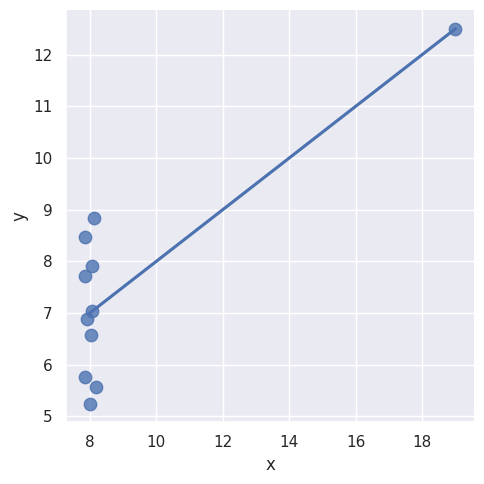

In [46]:
sns.lmplot(x="x", y="y"
           , data=anscombe.query("dataset == 'IV'")
           , ci=None,  x_jitter=.2
           , scatter_kws={"s": 80})

二值变量如何拟合？也就是说x轴还是连续的total_bill, 而y轴是离散变量会如何拟合呢？

我们在小费数据上构造一个是否是“巨额小费”特征。

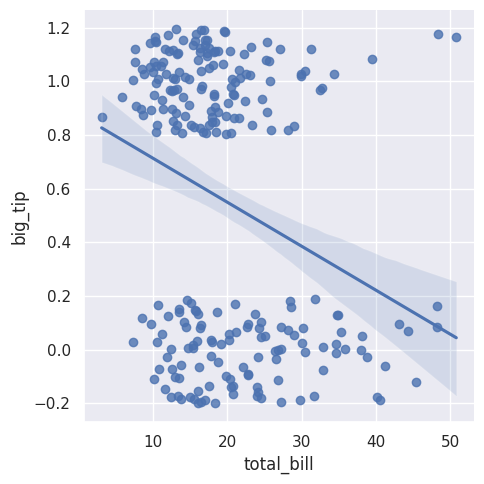

In [49]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
# 比例超过15%的消费为0，反正为1，作为y轴的离散变量
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=0.2) # y方向抖动0.2

尝试逻辑回归~

- $y=F(kx+b)$
- $F(x)=\frac{1}{1+e^{-x}}$

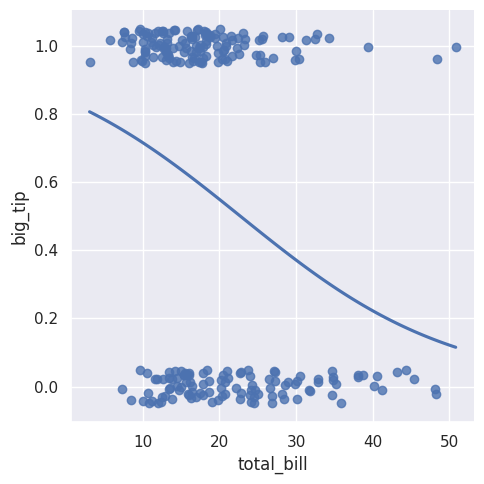

In [50]:
sns.lmplot(x="total_bill", y="big_tip"
           , data=tips, logistic=True, y_jitter=.05, ci=None) # logistic=True 开启逻辑回归

#### 残差图

如何评价拟合效果？残差曲线~ `sns.residplot` 函数！

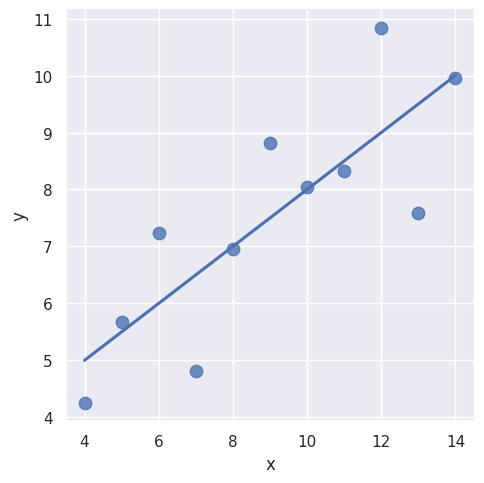

In [52]:
sns.lmplot(x="x", y="y"
           , data=anscombe.query("dataset == 'I'")
           , order=1, ci=None
           , scatter_kws={"s": 80})

<Axes: xlabel='x', ylabel='y'>

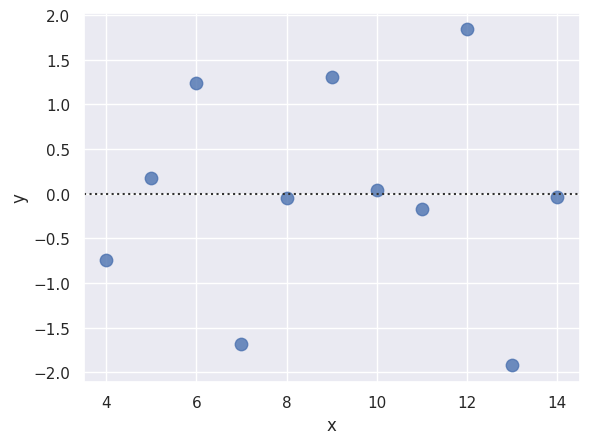

In [51]:
sns.residplot(x="x", y="y"
    , data=anscombe.query("dataset == 'I'")
              , scatter_kws={"s": 80}) 
# residue plot  : GOOD!

<Axes: xlabel='x', ylabel='y'>

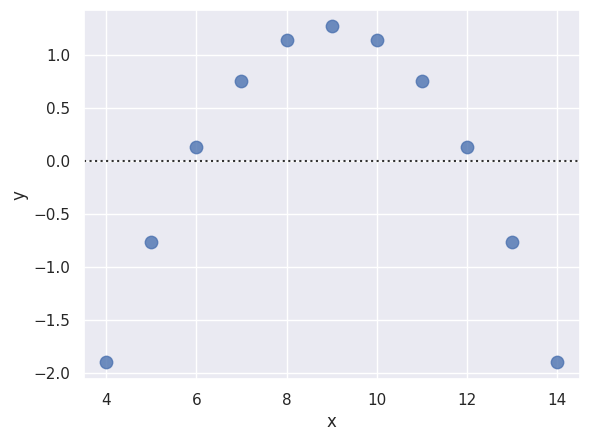

In [53]:
sns.residplot(x="x", y="y"
    , data=anscombe.query("dataset == 'II'")
              , scatter_kws={"s": 80})
# residue plot : BAD!

- 拟合的好，就是0均值的白噪声分布N(0,σ2)，不含任何人为模态（测量误差造成）
- 拟合的差，就能看出一些模式

关于残差为何能够判断线性回归的拟合好坏，可详细参考这个帖子：

- [为啥一定要用残差图检查你的回归分析？](https://blog.csdn.net/wctttty/article/details/77323277)
- [Why You Need to Check Your Residual Plots for Regression Analysis: Or, To Err is Human, To Err Randomly is Statistically Divine](https://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis)

#### 变量间的条件关系探索

加上离散变量条件，来进一步看不同条件情况下，tip和total_bill的关系上有什么不同。

- 男女在给小费占总订单的比例

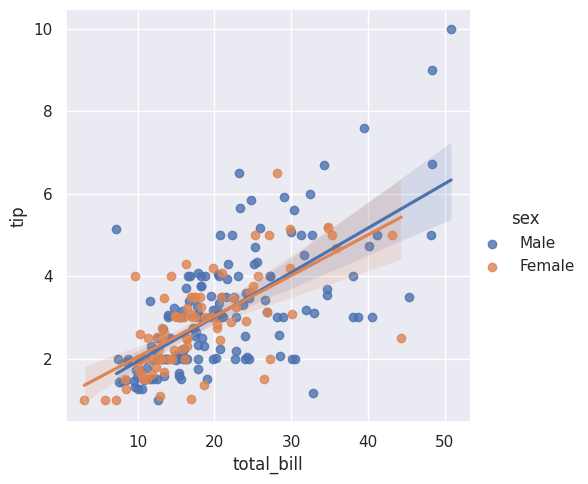

In [54]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips)

上图斜率表示tip占total_bill的比例，看上去男性要更慷慨一点~

此外，橙色的置信区间更宽，可以覆盖住蓝色的置信区间，说明女性比男性给小费的时候，更感性，给的比例变化可能更多，当然也可能宽的地方数据量比较少导致。

- 是否抽烟对给小费的影响

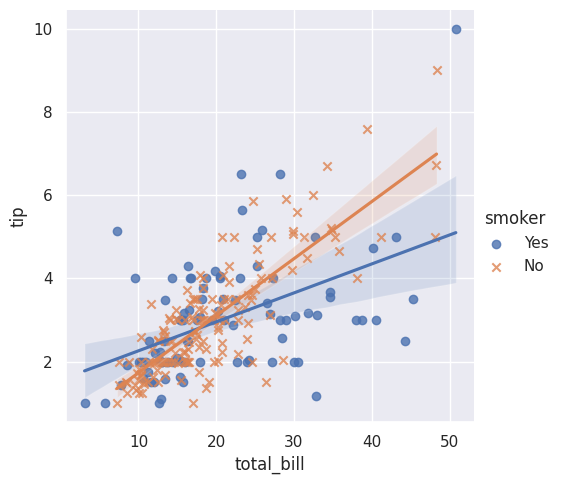

In [55]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips
           , markers=["o", "x"]) # markers 标记区分

显然一般不抽烟的人给的小费要更多些，抽烟人的置信区间更宽些，除了可能是数据量不够外，也可能是抽烟人在理性上会弱一些，给钱的时候更随意些吧。

接下来，我可以在上图基础上，尝试增加更多的分类条件。

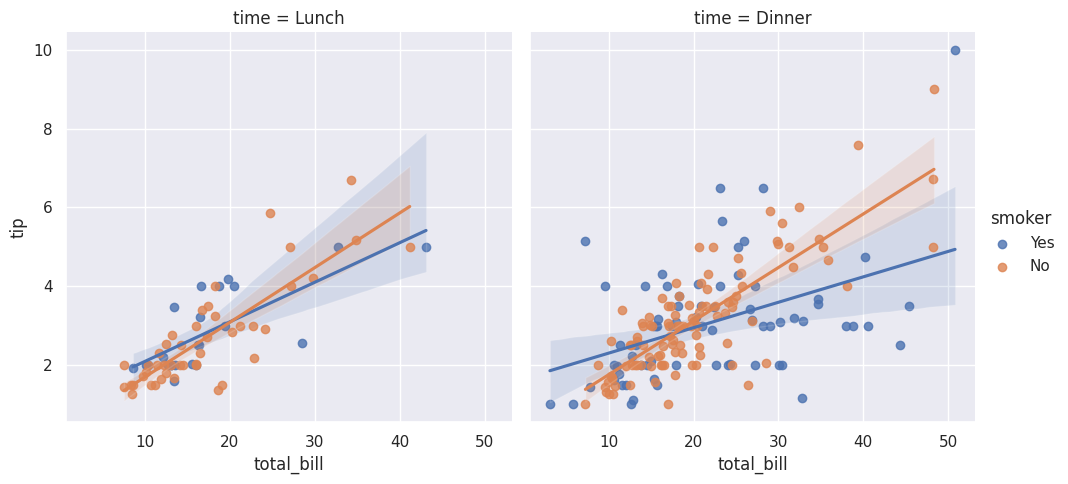

In [56]:
# col表示不同列
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips) 
# col: column

为什么中午的时候是否抽烟的人的斜率差别要小于晚餐呢？可能是中午不喝酒，中午吃饭较快，中午工作餐赶时间，晚餐常约约约等。。。

还可以进一步加条件哦！除了col还可以加row！

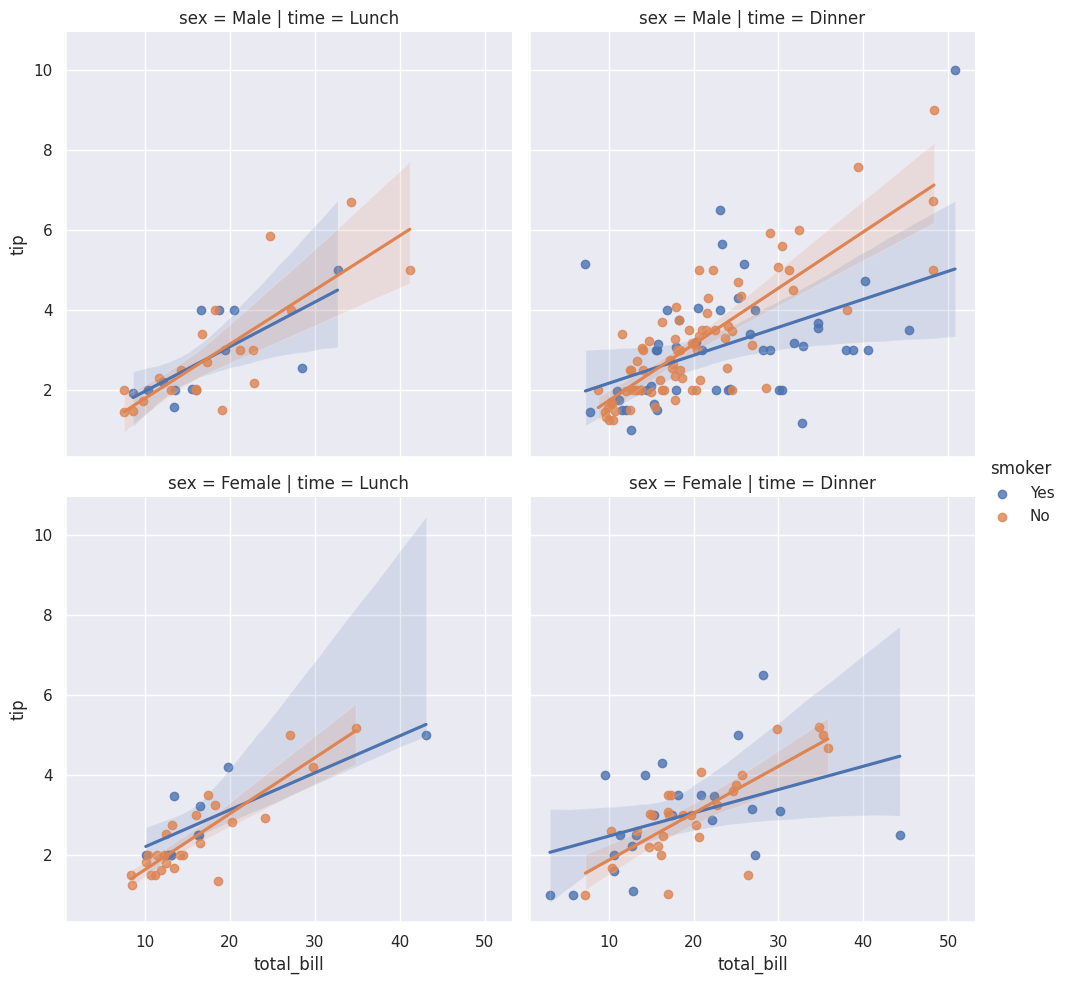

In [57]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", row="sex", data=tips)

小小结论：

- 不抽烟的人给的小费更多
- 抽烟的人给的小费更分散
- 女性相比男性小费更分散

#### 控制图片的大小和形状

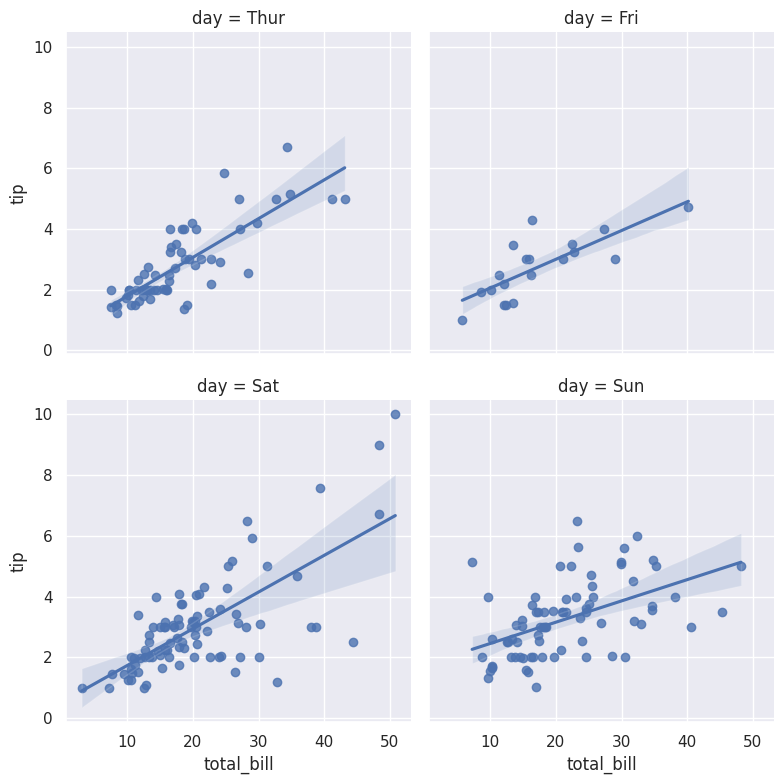

In [60]:
# col_wrap：控制每行多少个图
# size/height：控制图片高度（inch）
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, col_wrap=2, height=4) 
# col_wrap=1为什么会有问题？

看起来似乎周六比周日的小费更多哈~

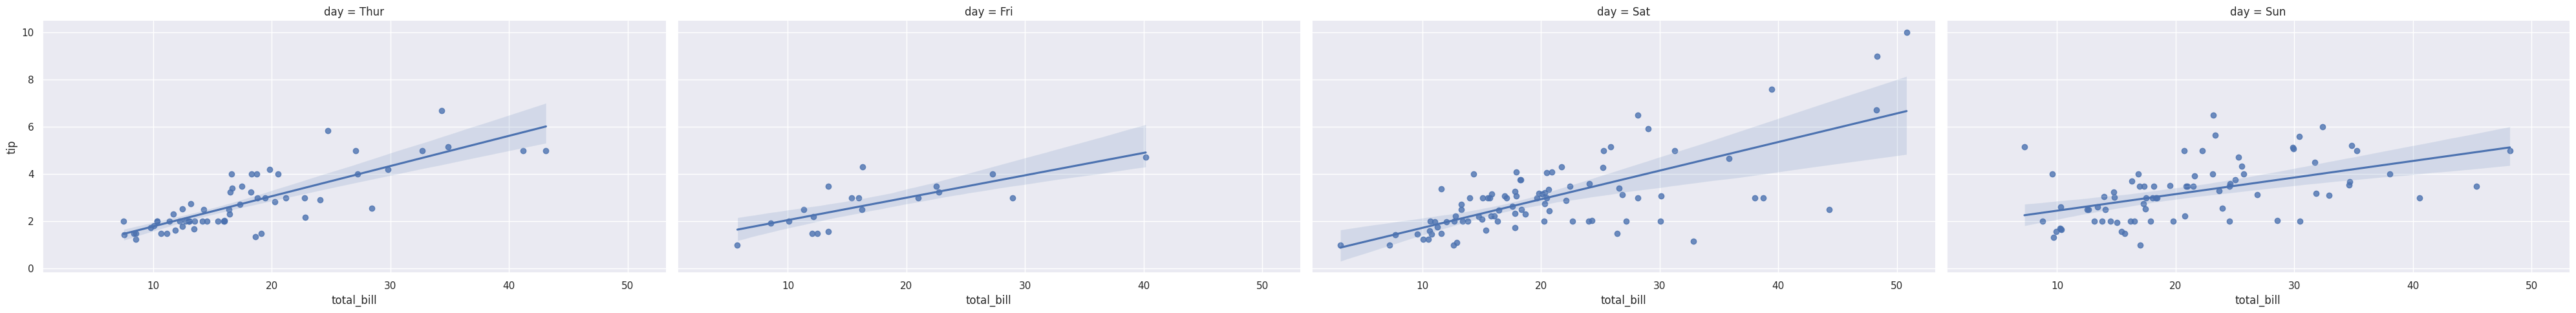

In [61]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=2)
# aspect：控制切面长高的缩放比例x/y eg: aspect=1 正方形

#### 本节小结

- 拟合曲线：lmplot(x, y, data, ci, x_estimator, robust, logistic)
- 残差曲线：residplot()
- 子图绘制：lmplot(row, col)
- 尺寸控制：lmplot(col_wrap, size, aspect)

### 如何让分布更直观（基于Seaborn）


先做一些设置：

In [62]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

#### 单变量分布

##### 灰度图

最方便快捷的方式~

<Axes: ylabel='Density'>

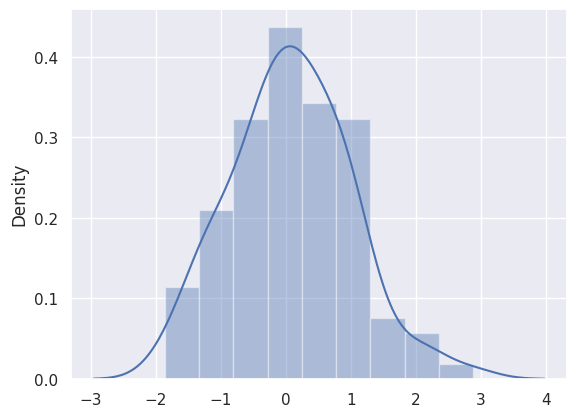

In [63]:
x = np.random.normal(size=100)
sns.distplot(x, kde=True)
# 核密度估计kde是默认为True的

想得到更精细的刻画？调节bins参数!

<Axes: >

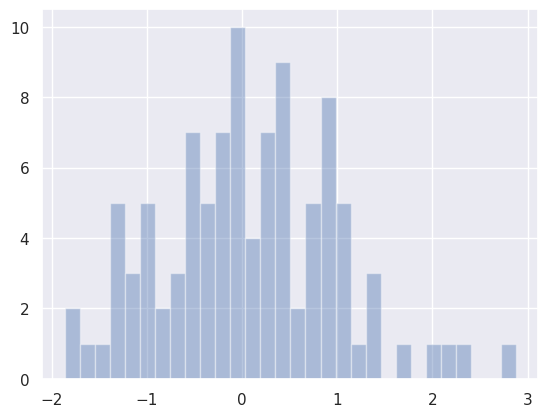

In [64]:
sns.distplot(x, kde=False, bins=30)
# bins=30 三十个柱子！

想配合着实例一起看？

<Axes: >

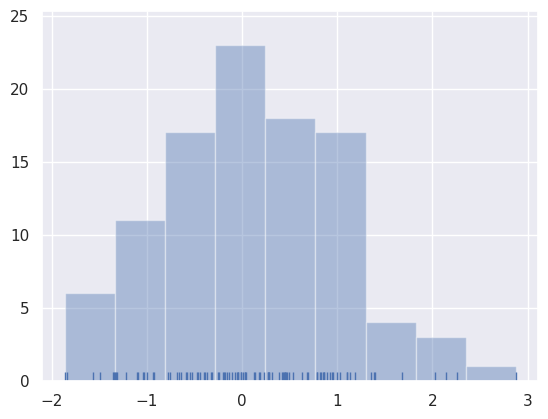

In [66]:
sns.distplot(x, kde=False, bins='auto', rug=True)
# rug 控制是否显示观测的小细条（边际毛毯）
# Whether to draw a rugplot on the support axis.

- 配合着实例一起看有什么好处？

- 答：指导你设置合适的bins。

注：上面的kde参数的开启与否是存在默认的带宽的，大概0.3左右。

>With matplotlib version 2.0 or later and numpy version 1.11 or later, you can now specify automatically-determined bins directly in matplotlib, by specifying, e.g. `bins='auto'`.
>
>This uses the maximum of the Sturges and Freedman-Diaconis bin choice. You can read more about the options in the [numpy.histogram](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) docs and [numpy.histogram_bin_edges](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges).

##### 核密度估计(KDE)

通过观测估计概率密度函数的形状。有什么用呢？待定系数法求概率密度函数~

核密度估计的步骤：

- 每一个观测附近用一个正态分布曲线近似
- 叠加所有观测的正态分布曲线
- 归一化

在seaborn中怎么画呢？

<Axes: ylabel='Density'>

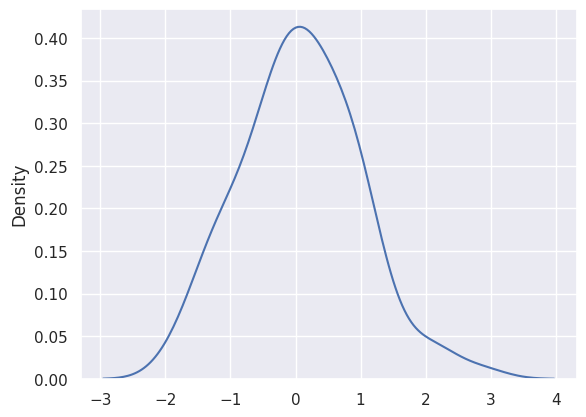

In [67]:
sns.kdeplot(x)

- bandwidth 的概念：用于近似的正态分布曲线的宽度
- bandwidth 越大，曲线越平缓

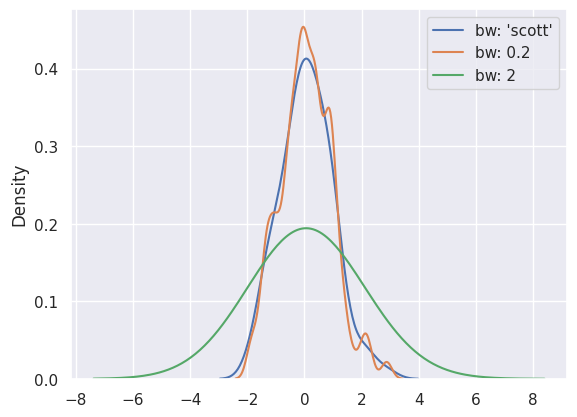

In [68]:
sns.kdeplot(x, label = "bw: 'scott'")
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2") # 过于平滑
plt.legend()

##### 模型参数拟合

<Axes: ylabel='Density'>

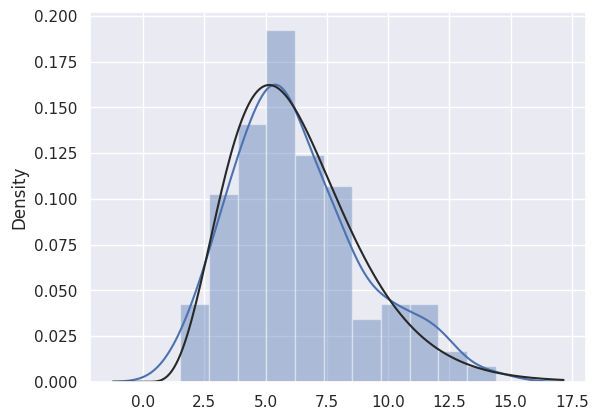

In [70]:
x = np.random.gamma(6, size=200)            # 一个gamma分布
sns.distplot(x, 
             kde=True, 
             fit=stats.gamma
            )  # 我们尝试性的猜是gamma函数

- 蓝色线是 sns.distplot(x) 所绘制的结果

- 黑色线是 sns.distplot(x, fit=stats.gamma) 所绘制的结果

#### 双变量分布

In [71]:
mean, cov = [0, 1], [(1, 0.5), (0.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200) 
# np.random.multivariate_normal() 多元正态分布，依据指定的均值和协方差生成数据
# 均值分别为0和1，方差都是1，点与点之间还有0.5的相关系数
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

x         y
0 -0.035434  2.095059
1 -1.025942  0.567045
2  0.029807 -0.504842
3 -0.469849  0.985867
4 -0.759971  0.572691

两个相关的正态分布~

##### 散点图

对于两个相关的分布，有牛逼的 `sns.jointplot()` 函数可以利用：

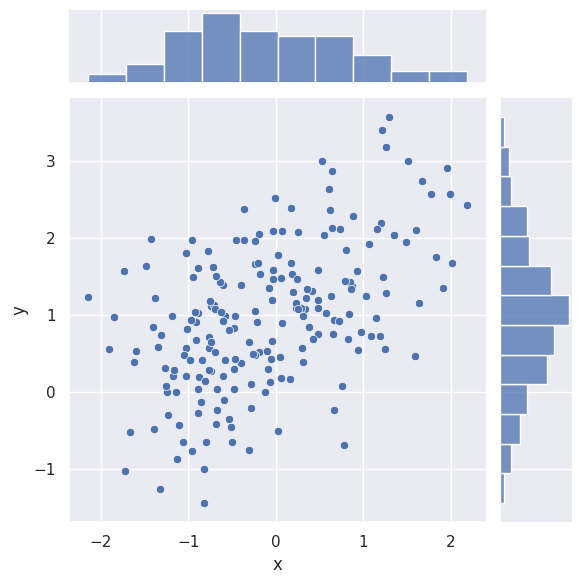

In [72]:
graph = sns.jointplot(x="x", y="y", data=df)

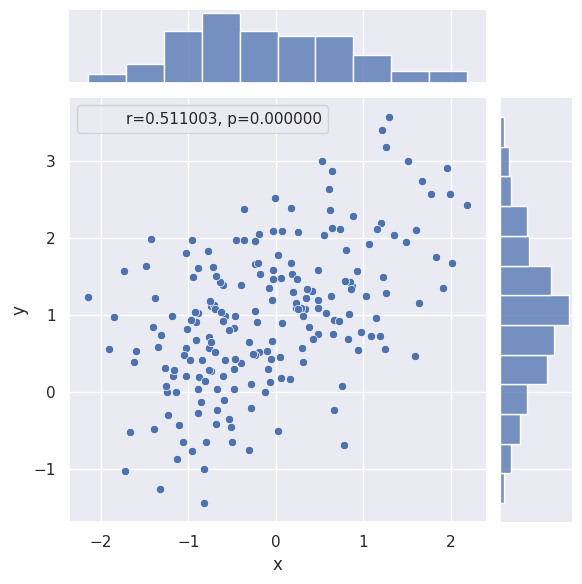

In [73]:
import scipy.stats as stats

graph = sns.jointplot(x="x", y="y", data=df)

r, p = stats.pearsonr(df.x, df.y)
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method


graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

图中信息：x与y散点图／x和y灰度图／personr相关性系数／p value抽样误差（p越小越好）

- 关于皮尔逊相关系数（Pearson Correlation Coefficient）

  - 相关链接：Discussion of Similarity Metrics，zh.wikipedia.org

  - pearsonr相关系数计算：

$$
\rho_{X,Y} = \frac{cov(X, Y)}{\sigma_X\sigma_Y}
$$

  - 简单的相关系数的分类：

    - 0.8-1.0 极强相关
    - 0.6-0.8 强相关
    - 0.4-0.6 中等程度相关
    - 0.2-0.4 弱相关
    - 0.0-0.2 极弱相关或无相关
    
![](https://cdn.sa.net/2023/12/08/sapZhkHftVwnTDI.jpg)
  - Pearson相关系数游戏：http://guessthecorrelation.com

##### 六角箱图

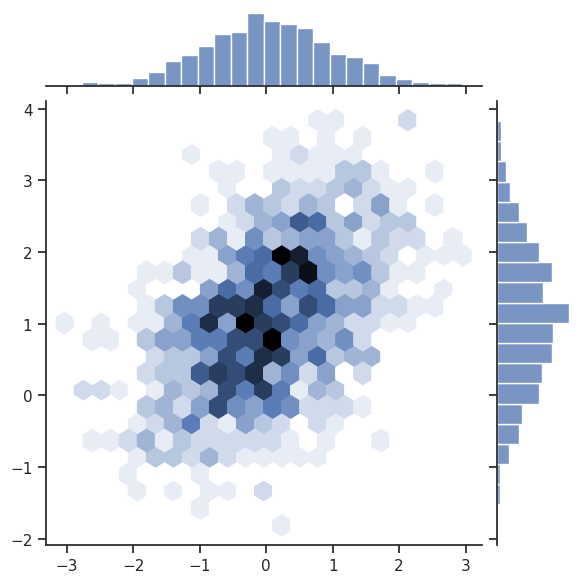

In [74]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("ticks"):
    sns.jointplot(x=x, y=y, kind="hex")
    # 可以指定什么形状（hex六角形）
# np.random.multivariate_normal(mean, cov, 10).T

##### 核密度估计

等高线型

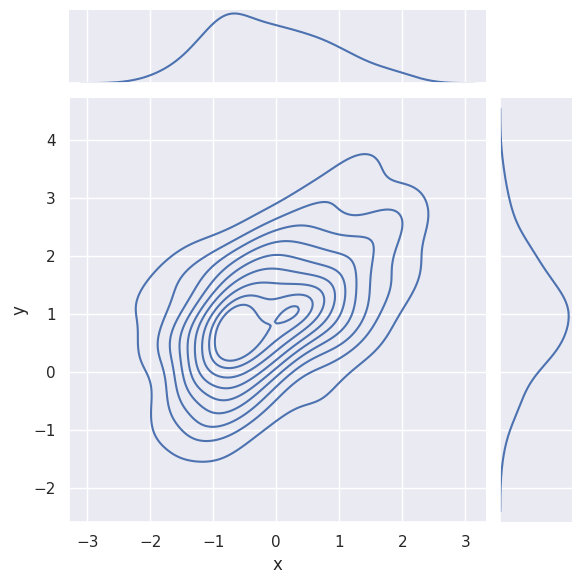

In [75]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

<Axes: xlabel='x', ylabel='y'>

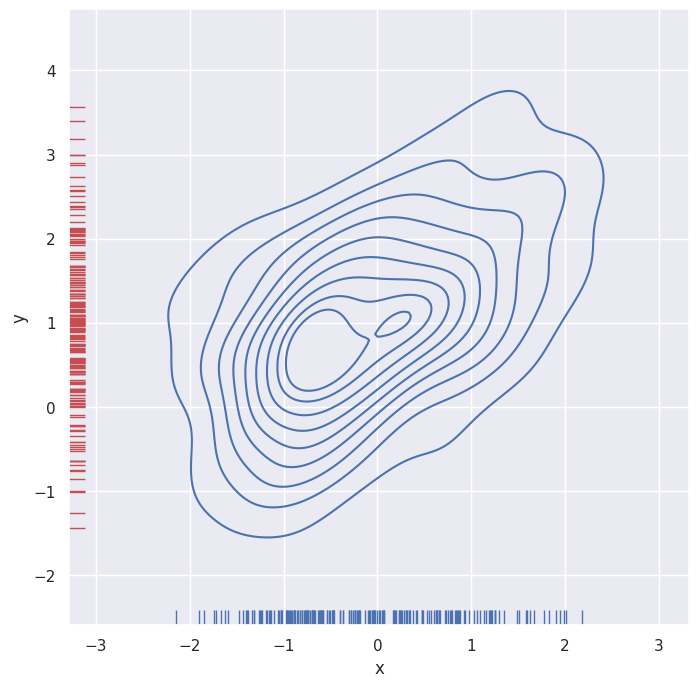

In [76]:
f, ax = plt.subplots(figsize=(8, 8)) #  axes
sns.kdeplot(x=df.x, y=df.y, ax=ax, shade=False)
# shade=False 不要填充，不然成等高线
sns.rugplot(df.x, color="b", ax=ax) 
sns.rugplot(df.y, vertical=True, ax=ax, color="r") 
# sns.rugplot 专门画rug ; vertical 水平化

想看到更连续梦幻的效果~

<Axes: xlabel='x', ylabel='y'>

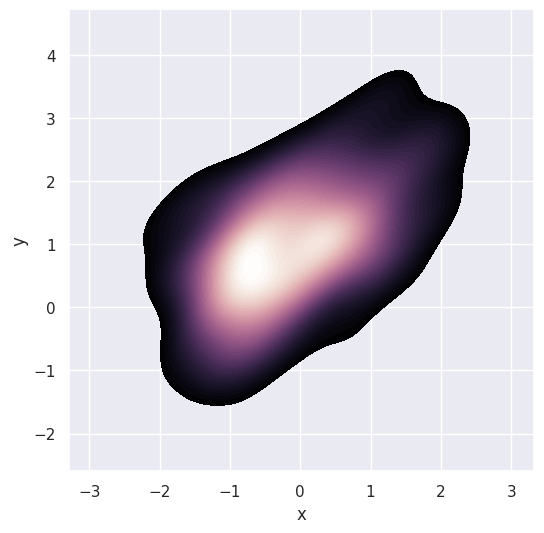

In [77]:
f, ax = plt.subplots(figsize=(6, 6))
# cubehelix颜色系统，亮度正比于强度，用于天文学图像绘制。http://www.mrao.cam.ac.uk/~dag/CUBEHELIX/
cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0) 
# cmap: color map 颜色映射
sns.kdeplot(x=df.x, y=df.y, cmap=cmap, n_levels=60, shade=True)

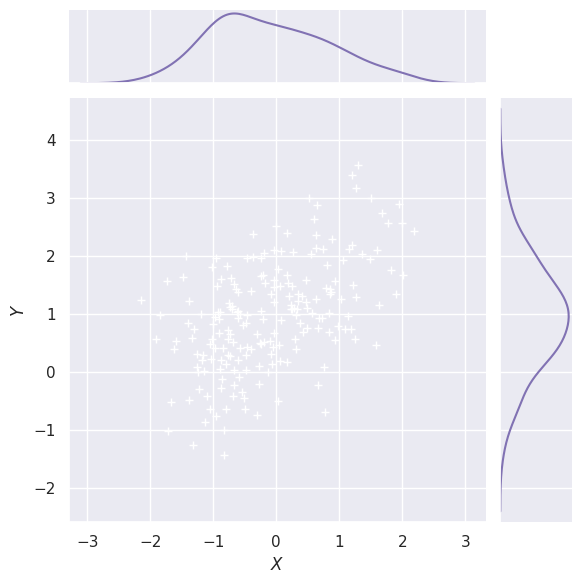

In [78]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0) # 设置中间图片背景的透明度
g.set_axis_labels("$X$", "$Y$") # Latex

注：关于kde图，一维的主要是猜分布的，二维的若能看出有好几个中心，就可以做聚类相关的工作。

#### 数据集中的两两关系

加载自带的鸢尾花数据集：

In [79]:
iris = sns.load_dataset("iris") 
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

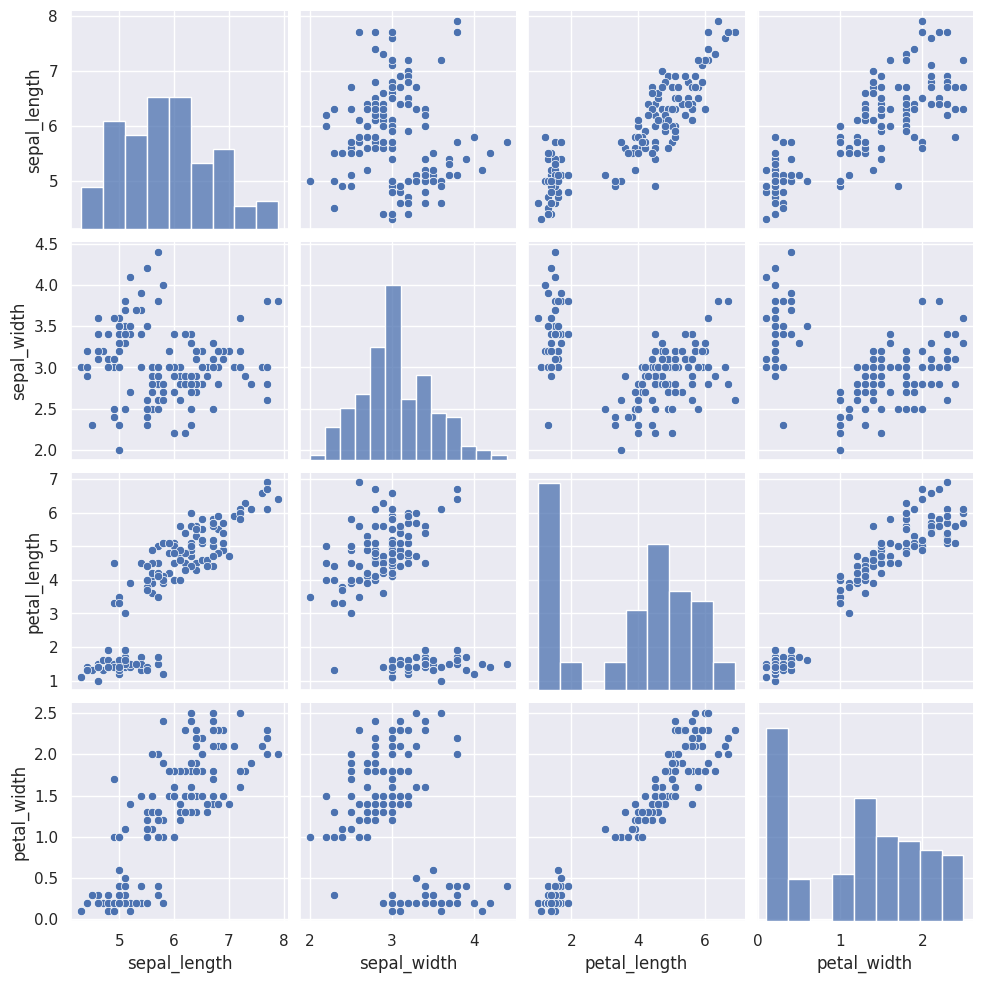

In [80]:
sns.pairplot(iris)  # 默认对角线hist，非对角线scatter

属性两两间的关系 + 属性的灰度图

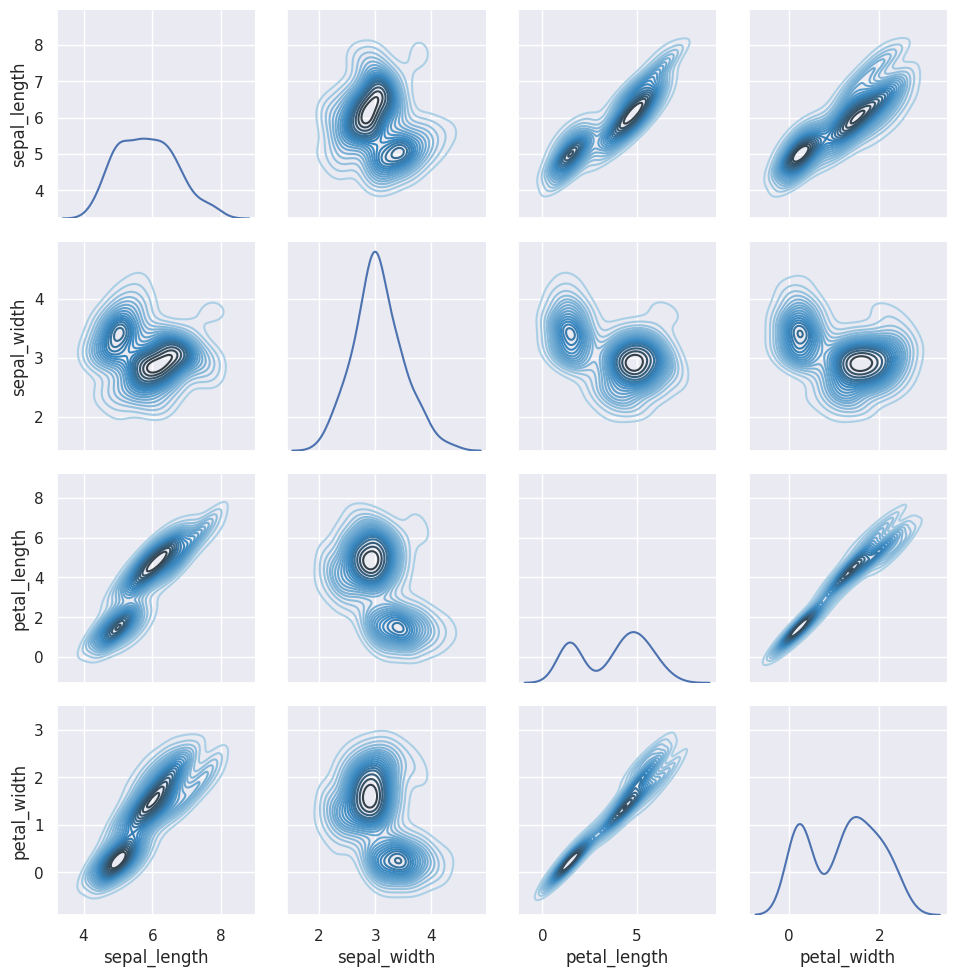

In [81]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot) # 对角线单个属性图
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=20) # 非对角线两个属性关系图

#### 本节小结

- distplot(bins, rug)
- kdeplot(bw, fit)
- joinplot(kind)
- pairplot

### 如何选择合适的可视化方案(基于Seaborn)


- 观测点的直接展示：swarmplot, stripplot
- 观测近似分布的展示：boxplot, violinplot
- 均值和置信区间的展示：barplot, pointplot

先做一些设置：

In [82]:
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

加载所需的数据集：

In [83]:
titanic = sns.load_dataset("titanic")

#### 分类散点图

当有一维数据是分类数据时，散点图成为了条带形状。

<Axes: xlabel='day', ylabel='total_bill'>

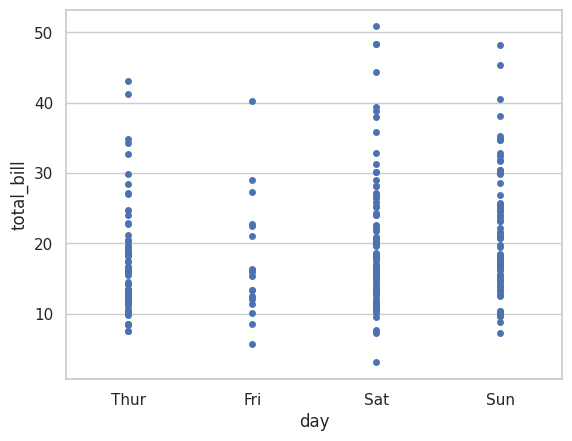

In [86]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=False)
# sns.lmplot(x="size", y="total_bill", data=tips, x_jitter=0.2)

散点都在一起看不清楚？还记得抖动的方法吗~

<Axes: xlabel='day', ylabel='total_bill'>

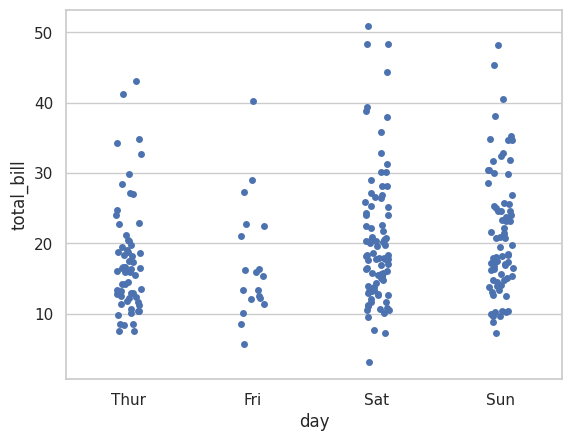

In [87]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

另外一种处理办法，是生成蜂群图，避免散点重叠~

<Axes: xlabel='day', ylabel='total_bill'>

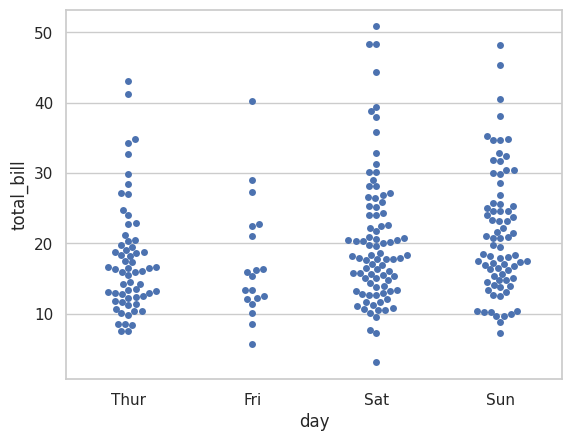

In [88]:
sns.swarmplot(x="day", y="total_bill", data=tips)

在蜂群图的基础上，我们可以对每一个一级分类内部可能存在的二级分类绘图

<Axes: xlabel='day', ylabel='total_bill'>

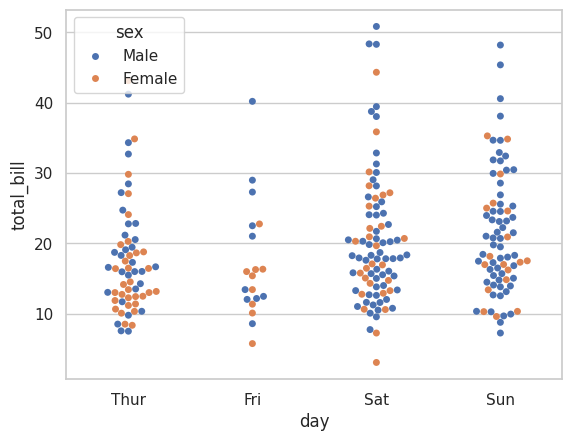

In [89]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

#### 分类分布图

##### 箱图

Keyworks: 上边缘、上四分位数、中位数、下四分位数、下边缘

<Axes: xlabel='day', ylabel='total_bill'>

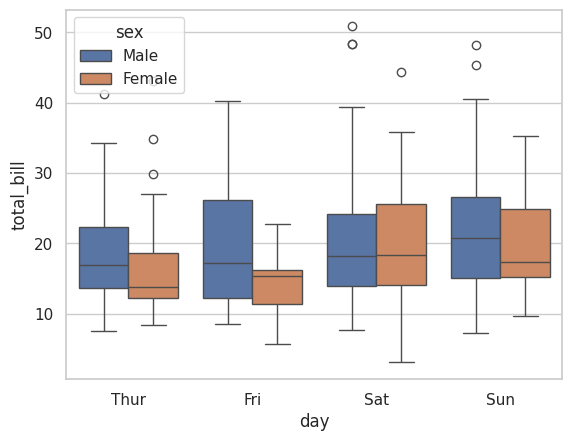

In [90]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)

##### 提琴图

箱图 + KDE(Kernel Distribution Estimation)

<Axes: xlabel='day', ylabel='total_bill'>

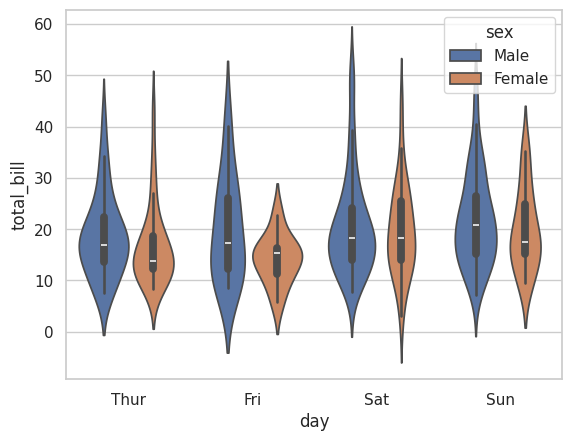

In [91]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)

图形边缘刻画的是kde曲线，亦即分布曲线。

<Axes: xlabel='day', ylabel='total_bill'>

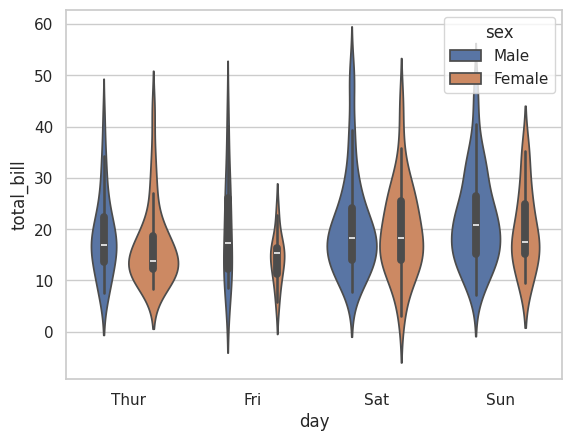

In [92]:
# scale: 可以取三种变量：
    # count样本量决定小提琴的宽度
    # area每个小提琴一样面积
    # width每个小提琴一样宽度
# scale_hue：scale时是否区分hue
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, scale="count", scale_hue=False
              )

<Axes: xlabel='day', ylabel='total_bill'>

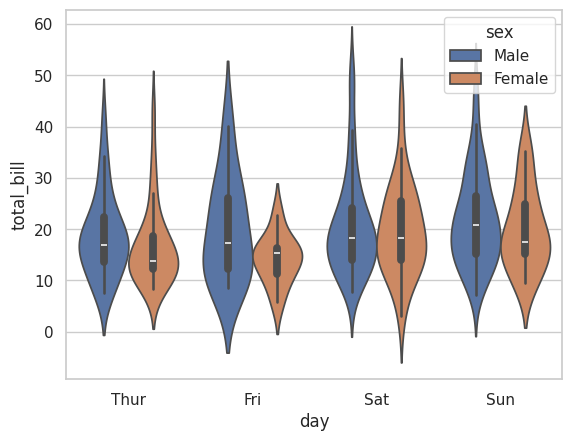

In [93]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, scale="width", scale_hue=True)

##### 非对称提琴图 (split=True)

<Axes: xlabel='day', ylabel='total_bill'>

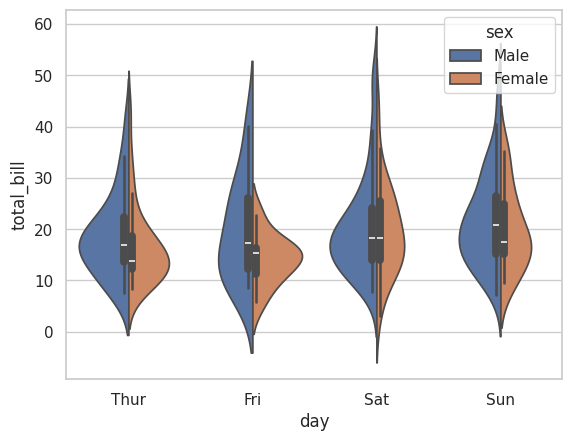

In [94]:
# split：一边一类
# inner：box箱式图，quartiles分位数，point或者 stick 直接标明样本
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True, inner="box")

<Axes: xlabel='day', ylabel='total_bill'>

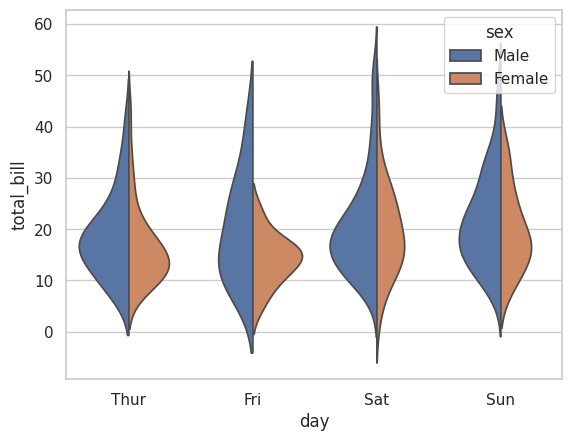

In [95]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True, inner=None)

#### 分类统计估计图

##### 统计柱状图

<Axes: xlabel='sex', ylabel='survived'>

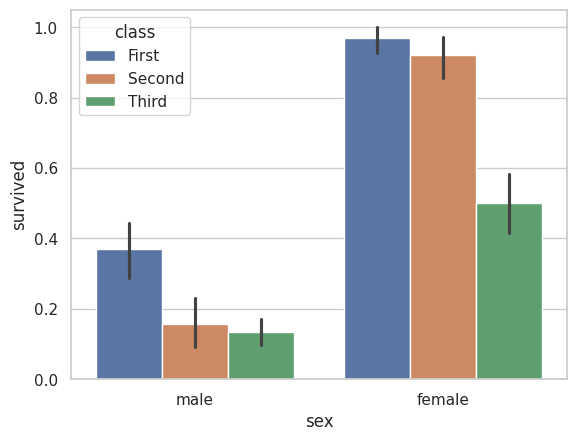

In [96]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic) 
# 泰坦尼克号幸存分析 y轴是均值，黑色线是对应的方差

##### 灰度柱状图

<Axes: xlabel='deck', ylabel='count'>

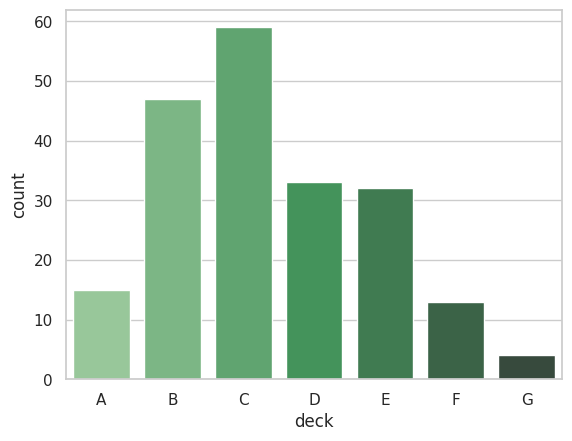

In [97]:
sns.countplot(x="deck", data=titanic, palette="Greens_d")
# 可以用颜色区分x轴的定序数据，

#### 2.5.4 分类子图

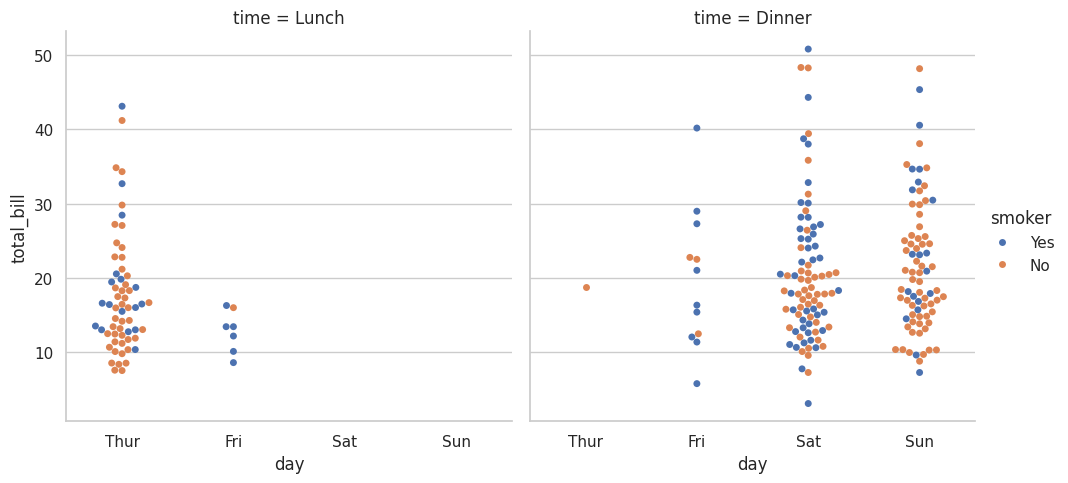

In [98]:
sns.catplot(x="day", y="total_bill", hue="smoker", col="time"
               , data=tips, kind="swarm")
# 除了total_bill是数值数据，其他三个都是离散数据

多分类标准的子图

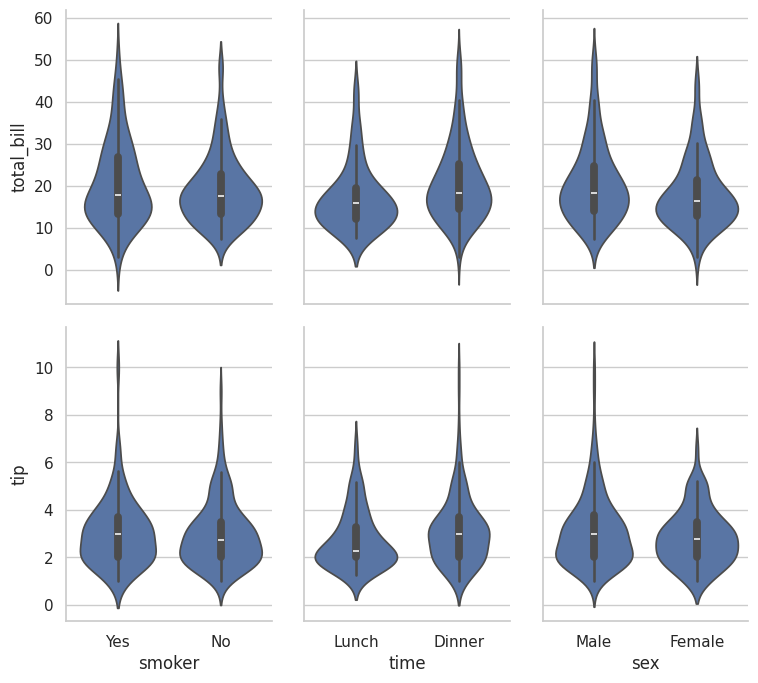

In [99]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, height=3.5
                )
g.map(sns.violinplot, palette="pastel");


#### 2.5.5 本节小结

-  swarmplot(data), stripplot(data)
- boxplot(data), voilinplot(data, scale, split, inner)
- barplot(data, hue), pointplot(data, hue)
- factorplot(col, kind)

## 课程学习已完成
> <time>1 min</time>

恭喜，你已经完成了本实验的全部学习任务

# 华盛顿自行车租赁情况分析案例(Seaborn)


## 实验准备

> <time>5 min</time>

### 实验背景

Seaborn是基于matplotlib的图形可视化python包。它提供了一种高度交互式界面，便于用户能够做出各种有吸引力的统计图表。

通过本次实验我们对 Seaborn 在数据可视化的具体应用进行进一步理解与解读。

### 实验步骤

本次实验分为以下几个环节：
- 1) 确认数据
- 2) 配置参数
- 3) 关联分析
- 4) 分布分析
- 5) 组间分析


## 实验操作

> <time>60 min</time>

### 步骤1：确认数据


首先，引入案例所需的python库，本案例需要的库有：
- pandas ： 读取数据到DataFrame
- urllib ： 获取网络数据
- tempfile : 创建临时文件系统
- shutil : 文件操作
- zipfile : 压缩解压

In [100]:
import pandas as pd 
from scipy import stats, integrate
from warnings import filterwarnings
filterwarnings('ignore')
from urllib import request 
import urllib
import tempfile 
import shutil 
import zipfile 


建立临时目录，并下载所需数据集，然后解压：

In [101]:
temp_dir = tempfile.mkdtemp() 
data_source = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip' # 网络数据地址
zipname = temp_dir + '/Bike-Sharing-Dataset.zip' # 拼接文件和路径
try:
    urllib.urlretrieve(data_source, zipname) # 获得数据
except:
    urllib.request.urlretrieve(data_source, zipname) # 获得数据

zip_ref = zipfile.ZipFile(zipname, 'r') # 创建一个ZipFile对象处理压缩文件
zip_ref.extractall(temp_dir) # 解压
zip_ref.close()

使用pandas读取解压后的csv文件：

In [102]:
daily_path = temp_dir + '/day.csv'
daily_data = pd.read_csv(daily_path) # 读取csv文件


对数据进行一些初步处理：
- 字符串转换成日期数据
- 去掉不关注的列

In [103]:
daily_data['dteday'] = pd.to_datetime(daily_data['dteday']) # 把字符串数据传换成日期数据
drop_list = ['instant', 'season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'atemp', 'hum'] # 不关注的列
daily_data.drop(drop_list, inplace = True, axis = 1) # inplace=true在对象上直接操作


看一看处理后的数据：

In [104]:
daily_data.head() # 看一看数据哈~

dteday  weekday      temp  windspeed  casual  registered   cnt
0 2011-01-01        6  0.344167   0.160446     331         654   985
1 2011-01-02        0  0.363478   0.248539     131         670   801
2 2011-01-03        1  0.196364   0.248309     120        1229  1349
3 2011-01-04        2  0.200000   0.160296     108        1454  1562
4 2011-01-05        3  0.226957   0.186900      82        1518  1600

最后，删除临时文件目录

In [105]:
shutil.rmtree(temp_dir) # 删除临时文件目录

### 步骤2：配置参数


引入matplotlib和seaborn包

In [106]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


对seaborn做一些设置：

In [107]:
sns.set_style("white")

### 步骤3：关联分析


- lmplot

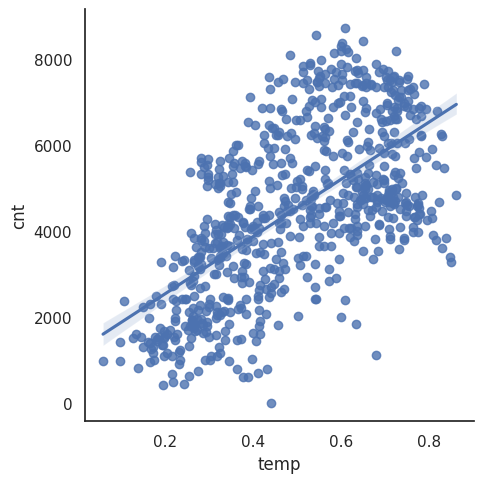

In [108]:
g = sns.lmplot(x="temp", y="cnt", data=daily_data)

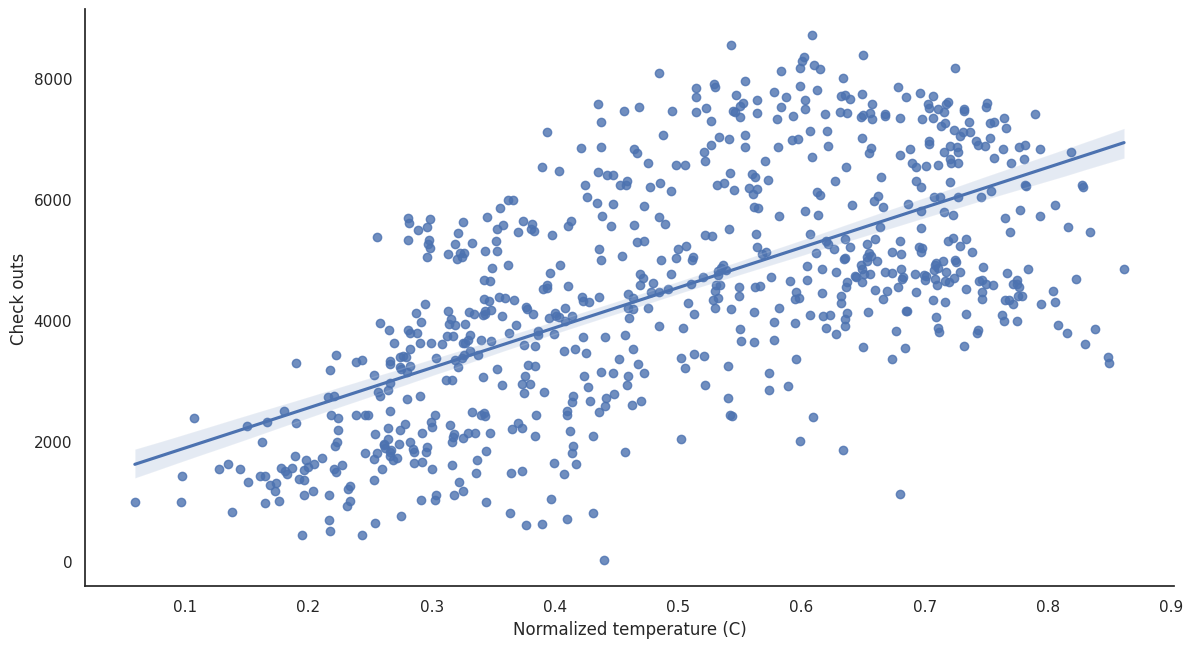

In [109]:
g = sns.lmplot(x="temp", y="cnt", data=daily_data)
g.fig.set_size_inches(14, 7)# 设置尺寸等可用matplotlib里的函数即可
g.set_axis_labels('Normalized temperature (C)', 'Check outs')

### 步骤4：分布分析

- distplot
- jointplot

In [110]:
daily_data.head()

dteday  weekday      temp  windspeed  casual  registered   cnt
0 2011-01-01        6  0.344167   0.160446     331         654   985
1 2011-01-02        0  0.363478   0.248539     131         670   801
2 2011-01-03        1  0.196364   0.248309     120        1229  1349
3 2011-01-04        2  0.200000   0.160296     108        1454  1562
4 2011-01-05        3  0.226957   0.186900      82        1518  1600

Text(0.5, 0, 'Value')

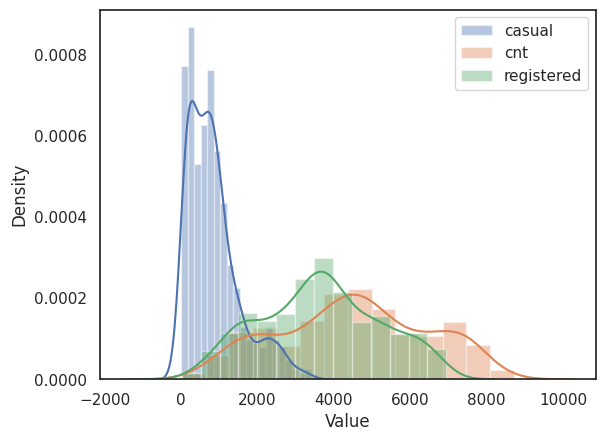

In [111]:
sns.distplot(daily_data["casual"], label = 'casual')     # 红色 类似指数衰减
sns.distplot(daily_data["cnt"], label = 'cnt')           # 绿色
sns.distplot(daily_data["registered"], label = 'registered') # 蓝色 类似正态分布
plt.legend()
plt.xlabel('Value')
# 要是发现有的图形显示不全，就先画那个显示不全的图形在画布上

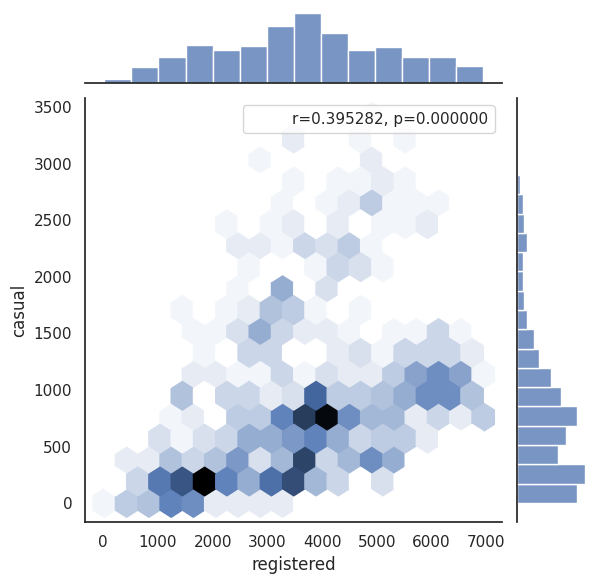

In [112]:
import scipy.stats as stats

graph = sns.jointplot(data=daily_data, x="registered", y="casual", kind="hex")

r, p = stats.pearsonr(daily_data.registered, daily_data.casual)
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

pearsonr相关系数比想象得高哦～

- 相关 vs 因果
    1. A 与 B 是相关
    2. 先有A 或先有B
    3. 扣除混淆变量
    - 就能推出因果

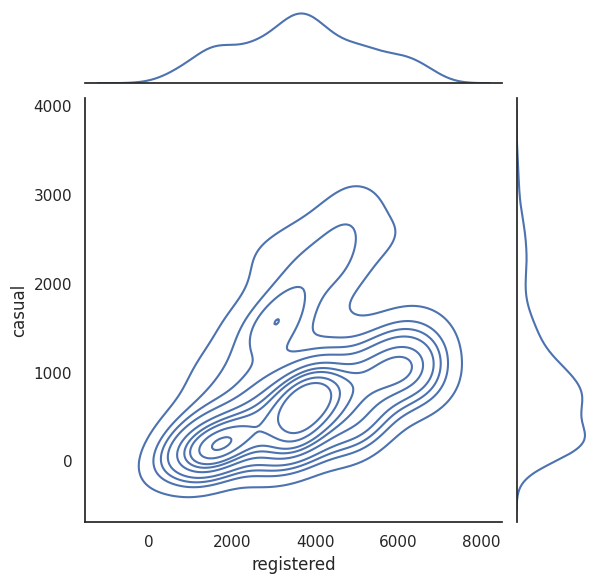

In [113]:
sns.jointplot(data=daily_data, x="registered", y="casual", kind="kde")

画了二维的kde后，可以看到人的行为模式都会固定在上面的圈圈中，有助于帮助我们找到其中究竟有怎样的共同点。

### 步骤5：组间分析


<Axes: xlabel='weekday', ylabel='registered'>

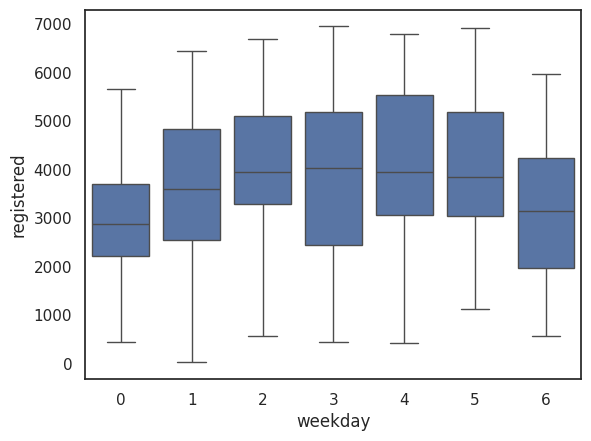

In [114]:
sns.boxplot(data=daily_data, x="weekday", y="registered")
# sns.violinplot(data=daily_data, x="weekday", y="registered", scale="count")

提琴图看其中的分布，可以看到每天预约租车的都基本是正态分布。

- 提琴图的说明：

  - 白色点是中位数，很粗的线可以看出来箱图的上下边界，猫须就是1.5倍的四分卫截距。

<Axes: xlabel='weekday', ylabel='casual'>

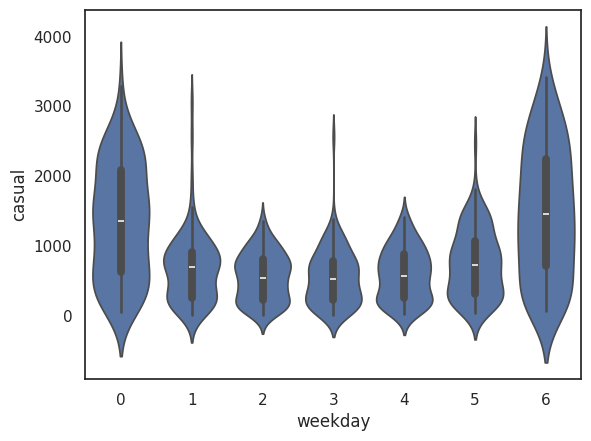

In [115]:
# sns.boxplot(data=daily_data, x="weekday", y="casual")
sns.violinplot(data=daily_data, x="weekday", y="casual", scale="count") 
# count, area, width

In [116]:
daily_data

dteday  weekday      temp  windspeed  casual  registered   cnt
0   2011-01-01        6  0.344167   0.160446     331         654   985
1   2011-01-02        0  0.363478   0.248539     131         670   801
2   2011-01-03        1  0.196364   0.248309     120        1229  1349
3   2011-01-04        2  0.200000   0.160296     108        1454  1562
4   2011-01-05        3  0.226957   0.186900      82        1518  1600
..         ...      ...       ...        ...     ...         ...   ...
726 2012-12-27        4  0.254167   0.350133     247        1867  2114
727 2012-12-28        5  0.253333   0.155471     644        2451  3095
728 2012-12-29        6  0.253333   0.124383     159        1182  1341
729 2012-12-30        0  0.255833   0.350754     364        1432  1796
730 2012-12-31        1  0.215833   0.154846     439        2290  2729

[731 rows x 7 columns]

非预约租车的每天差不多都有指数衰减的趋势, 尤其是工作日.

## 课程学习已完成
> <time>1 min</time>

恭喜，你已经完成了本实验的全部学习任务